## 从高维数据向低维数据的映射

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [3]:
from playML.PCA import PCA

pca = PCA(n_components=2)
%time pca.fit(X, k=100)
%time pca.fit(X)

Wall time: 3.29 s
Wall time: 3.28 s


PCA(n_components=2)

In [4]:
pca.components_

array([[ 0.79617135,  0.60507121],
       [-0.60507121,  0.79617135]])

In [5]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [6]:
X_reduction = pca.transform(X)

In [7]:
X_reduction.shape

(100, 1)

In [8]:
X_restore = pca.inverse_transform(X_reduction)

In [9]:
X_restore.shape

(100, 2)

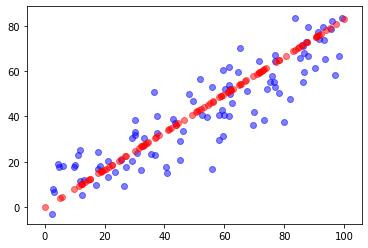

In [10]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)
plt.show()
# 降维恢复之后只能恢复到主成分轴上

### scikit-learn中的PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
# 因为计算方法不一样(严密的数学求解)，所以轴方向不一样，但是无所谓
pca.components_

array([[-0.80276638, -0.59629367]])

In [14]:
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

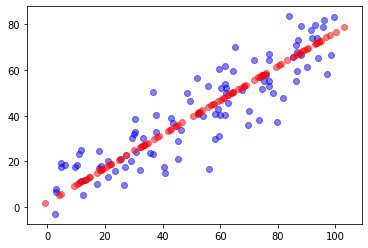

In [15]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)
plt.show()